In [ ]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import re

# Clustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn_extra.cluster import KMedoids

#Scaling
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score

In [ ]:
# scaling 함수
def df_scaler(data, cols, scale):
    df_cp = data.copy()
    
    if scale == "minmax":
        X = df_cp.loc[:,cols]
        MinMaxScalers = MinMaxScaler()
        MinMaxScalers.fit(X)
        df_MinMaxScaler = MinMaxScalers.transform(X)
        df_cp.loc[:, cols] = df_MinMaxScaler
    elif scale == "standard" :
        X = df_cp.loc[:,cols]
        StandardScalers = StandardScaler()
        StandardScalers.fit(X)
        df_StandardScalers = StandardScalers.transform(X)
        df_cp.loc[:, cols] = df_StandardScalers
    elif scale == "robust" :
        X = df_cp.loc[:,cols]
        RobustScalers = RobustScaler()
        RobustScalers.fit(X)
        df_RobustScaler = RobustScalers.transform(X)
        df_cp.loc[:, cols] = df_RobustScaler
    else:
        print("wrong")
    return df_cp

In [ ]:
# cut-off된 데이터프레임 호출
df = pd.read_csv("최종데이터_등급.csv", encoding='cp949')
df = df[df['avg']<=5]
df['multi_pop'] = df['1인가구']*df['거주인구수']
df

,Unnamed: 0,역사명,역위도,역경도,행정동,공실여부,공실_총_면적,1인가구,4인가구,1-4_사업체수,...,1인 가구 등급,9인이하_사업체수.1,9인이하_사업체수 등급,거주인구수.1,거주인구수 등급,일평균 승하차인구수.1,일평균 승하차인구수 등급,sum,avg,multi_pop
2,68,가산디지털단지역,37.481393,126.882605,가산동,0,0.00,12360,651,9907,...,1,0.98,1,0.50,5,0.97,1,8,2.00,288939720
6,43,강남구청역,37.517160,127.041219,삼성동,1,73.30,4601,1317,929,...,5,0.19,7,0.46,5,0.81,3,20,5.00,104649745
7,86,강남역,37.497202,127.028054,역삼1동,1,39.90,17411,1063,10193,...,1,0.97,1,0.87,3,0.99,1,6,1.50,619936066
9,184,강동역,37.535879,127.132079,성내2동,0,0.00,6810,1060,1542,...,3,0.53,5,0.52,5,0.66,4,17,4.25,162963300
10,9,강변역,37.534877,127.094694,구의3동,0,0.00,4159,2264,2098,...,5,0.68,4,0.69,4,0.87,3,16,4.00,120157669
12,54,개봉역,37.494698,126.858504,개봉1동,0,0.00,5319,2207,1462,...,4,0.47,5,0.85,3,0.76,4,16,4.00,181308753
14,158,개화산역,37.572312,126.806289,방화2동,0,0.00,5820,1172,2889,...,4,0.76,4,0.48,5,0.15,7,20,5.00,135291720
17,7,건대입구역,37.540609,127.069963,자양4동,1,101.72,5097,824,1538,...,4,0.55,5,0.26,6,0.96,1,16,4.00,88983426
19,137,경찰병원역,37.495765,127.124300,가락본동,0,0.00,4770,1762,2613,...,5,0.77,3,0.64,4,0.23,6,18,4.50,126710280
21,215,고려대역,37.590339,127.035864,종암동,0,0.00,6533,2792,1692,...,3,0.61,4,0.95,2,0.25,6,15,3.75,255139782


In [ ]:
raw = df[['역사명', '역위도', '역경도','multi_pop','1인가구','4인가구','거주인구수','공실_총_면적','9인이하_사업체수','일평균 승하차인구수']]
raw.head()

,역사명,역위도,역경도,multi_pop,1인가구,4인가구,거주인구수,공실_총_면적,9인이하_사업체수,일평균 승하차인구수
2,가산디지털단지역,37.481393,126.882605,288939720,12360,651,23377,0.0,13365,88148.82143
6,강남구청역,37.517160,127.041219,104649745,4601,1317,22745,73.3,975,39223.67857
7,강남역,37.497202,127.028054,619936066,17411,1063,35606,39.9,13136,116604.32140
9,강동역,37.535879,127.132079,162963300,6810,1060,23930,0.0,1724,26892.17857
10,강변역,37.534877,127.094694,120157669,4159,2264,28891,0.0,2469,49017.03571


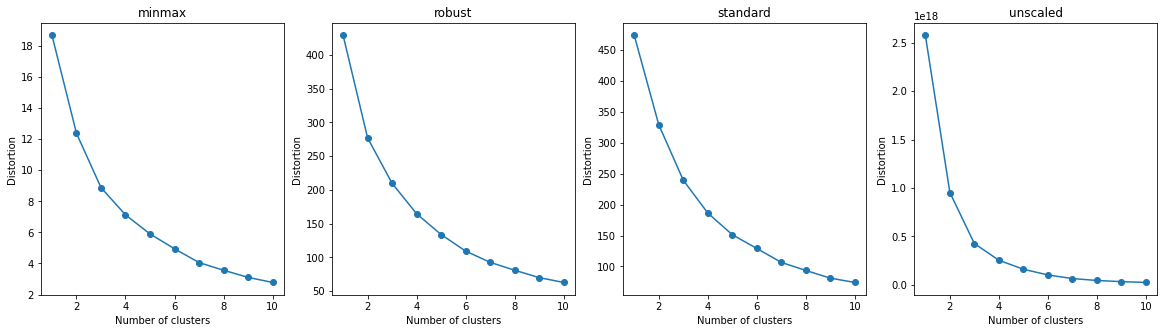

In [ ]:
df = df.copy()
cols = ['multi_pop','9인이하_사업체수','일평균 승하차인구수']
cols_ = ['multi_pop','9인이하_사업체수','일평균 승하차인구수']
scaler = ['minmax', 'robust', 'standard', 'unscaled']
box = {}

for m in scaler:
    if m == 'unscaled':
        box[m] = df.loc[:,cols]
    else:
        box[m] = df_scaler(df, cols_, scale = m)


n = len(box)
fig, axes = plt.subplots(1,n,figsize = (5 * n, 5))
for i in range(len(scaler)):
    distortions = []
    for j in range(1, 11):
        km = KMeans(n_clusters=j)
        km.fit(box[scaler[i]].loc[:,cols])
        distortions.append(km.inertia_) # 군집 내 분산, 적을수록 좋음
    
    axes[i].plot(range(1, 11), distortions, marker='o')
    axes[i].set_title(scaler[i])
    axes[i].set_xlabel('Number of clusters')
    axes[i].set_ylabel('Distortion')
plt.show()

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

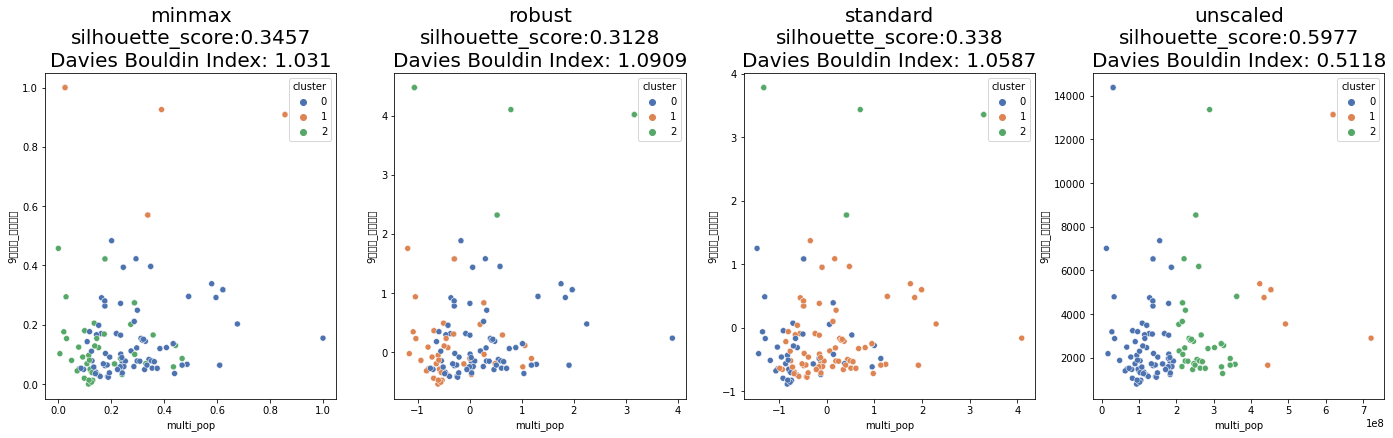

In [ ]:
n = len(box)
fig, axes = plt.subplots(1,n,figsize = (6 * n, 6))
for i in range(len(scaler)):
    
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(box[scaler[i]].loc[:,cols])
    box[scaler[i]]['cluster'] = kmeans.labels_
    
    s = sns.scatterplot(x = cols[0], y = cols[1], data = box[scaler[i]], marker='o', hue = 'cluster', palette = 'deep', ax = axes[i])
    s.set_title(f"{scaler[i]}\nsilhouette_score:{round(silhouette_score(box[scaler[i]].loc[:,cols], kmeans.labels_),4)}\nDavies Bouldin Index: {round(davies_bouldin_score(box[scaler[i]].loc[:,cols],kmeans.labels_),4)}", fontsize = 20)

    #s.set_xlabel(cols[0])
    #s.set_ylabel(cols[1])
plt.show()

# 1. K-Means

## 1-1 Standard Scaler

In [ ]:
# scaling (z-standardization)
data = raw.copy()
data = data[['multi_pop','9인이하_사업체수','일평균 승하차인구수']]
data = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns, index = data.index)
data.head()

,multi_pop,9인이하_사업체수,일평균 승하차인구수
2,0.702221,3.432930,2.264122
6,-0.740489,-0.829892,0.248817
7,3.293419,3.354142,3.436249
9,-0.283983,-0.572196,-0.259137
10,-0.619086,-0.315876,0.652221


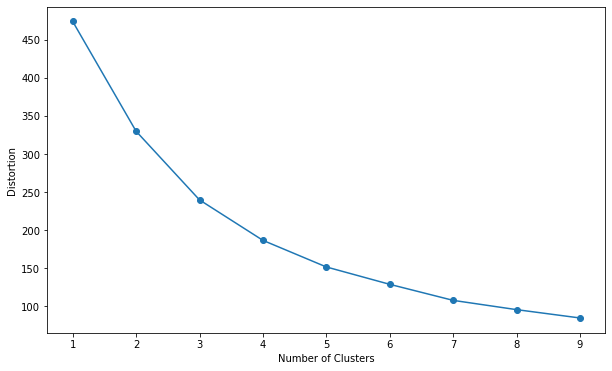

In [ ]:
# data 참조
data_elbow = data.copy()

distortions = []
for i in range(1,10):
    km = KMeans(
    n_clusters= i, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
    )
    km.fit(data_elbow)
    distortions.append(km.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,10), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
# k-means clustering

data1 = data.copy()
model1 = KMeans(n_clusters=3, random_state=2021009, algorithm='auto')
model1.fit(data1)

KMeans(n_clusters=3, random_state=2021009)

In [ ]:
# 각 군집(cluster) 표시
pred1 = model1.predict(data1)
pred1

array([2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1])

In [ ]:
# 원형 데이터에 군집 예측치 추가
data1['k_means_cluster'] = pred1
data1

,multi_pop,9인이하_사업체수,일평균 승하차인구수,k_means_cluster
2,0.702221,3.432930,2.264122,2
6,-0.740489,-0.829892,0.248817,0
7,3.293419,3.354142,3.436249,2
9,-0.283983,-0.572196,-0.259137,1
10,-0.619086,-0.315876,0.652221,0
12,-0.140366,-0.608665,0.040070,1
14,-0.500609,-0.102219,-1.022625,1
17,-0.863133,-0.568755,1.726986,0
19,-0.567789,-0.095682,-0.931674,1
21,0.437619,-0.502009,-0.887707,1


In [ ]:
# 군집별 통계(평균)
cluster_k1 = data1.groupby('k_means_cluster')
cluster_k1.mean()

,multi_pop,9인이하_사업체수,일평균 승하차인구수
k_means_cluster,,,
0,-0.553193,-0.302917,0.972808
1,0.137467,-0.175746,-0.571682
2,1.073458,3.173307,1.510683


In [ ]:
# 군집별 통계(중앙값)
cluster_k1 = data1.groupby('k_means_cluster')
cluster_k1.median()

,multi_pop,9인이하_사업체수,일평균 승하차인구수
k_means_cluster,,,
0,-0.754981,-0.463819,0.827777
1,-0.124416,-0.417028,-0.607393
2,0.557681,3.354142,1.472508


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

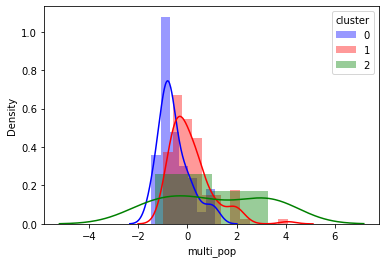

In [ ]:
# 시각화
import seaborn as sns

sns.distplot(data1[data1.k_means_cluster == 0]["multi_pop"], 
             color="blue", label=0)

sns.distplot(data1[data1.k_means_cluster == 1]["multi_pop"], 
             color="red", label=1)

sns.distplot(data1[data1.k_means_cluster == 2]["multi_pop"], 
             color="green", label=2)



plt.legend(title="cluster")
plt.show()

In [ ]:
raw1 = raw.copy()
raw1['k_means_cluster'] = pred1
raw1

,역사명,역위도,역경도,multi_pop,1인가구,4인가구,거주인구수,공실_총_면적,9인이하_사업체수,일평균 승하차인구수,k_means_cluster
2,가산디지털단지역,37.481393,126.882605,288939720,12360,651,23377,0.00,13365,88148.821430,2
6,강남구청역,37.517160,127.041219,104649745,4601,1317,22745,73.30,975,39223.678570,0
7,강남역,37.497202,127.028054,619936066,17411,1063,35606,39.90,13136,116604.321400,2
9,강동역,37.535879,127.132079,162963300,6810,1060,23930,0.00,1724,26892.178570,1
10,강변역,37.534877,127.094694,120157669,4159,2264,28891,0.00,2469,49017.035710,0
12,개봉역,37.494698,126.858504,181308753,5319,2207,34087,0.00,1618,34155.964290,1
14,개화산역,37.572312,126.806289,135291720,5820,1172,23246,0.00,3090,8357.142857,1
17,건대입구역,37.540609,127.069963,88983426,5097,824,17458,101.72,1734,75108.892860,0
19,경찰병원역,37.495765,127.124300,126710280,4770,1762,26564,0.00,3109,10565.142860,1
21,고려대역,37.590339,127.035864,255139782,6533,2792,39054,0.00,1928,11632.500000,1


In [ ]:
pd.set_option("display.max_rows", None)

analysis1 = raw1.copy()
analysis1 = analysis1.sort_values(by='k_means_cluster')
analysis1

,역사명,역위도,역경도,multi_pop,1인가구,4인가구,거주인구수,공실_총_면적,9인이하_사업체수,일평균 승하차인구수,k_means_cluster
168,수유역,37.637965,127.025443,178978065,6009,1764,29785,0.00,1977,53649.607140,0
46,김포공항역,37.562298,126.801711,135291720,5820,1172,23246,0.00,3090,45037.357140,0
47,까치산역,37.531684,126.846743,119816610,4870,1325,24603,0.00,1216,44617.321430,0
185,신사역,37.516188,127.020092,216379625,9625,728,22481,23.70,4520,45224.857140,0
204,양재역,37.483812,127.034577,266394612,6116,3072,43557,39.00,3048,55850.535710,0
50,남부터미널역,37.484825,127.016190,82729906,3997,1387,20698,0.00,3244,44289.821430,0
200,압구정역,37.526686,127.028370,108396873,2799,1126,38727,0.00,3589,48463.678570,0
56,노량진역,37.514072,126.941671,246940856,7736,1842,31921,0.00,1736,55181.964290,0
57,노원역,37.655055,127.062250,66845450,3310,1582,20195,0.00,2493,63206.000000,0
247,잠실역,37.513817,127.102342,16512793,979,1471,16867,28.60,2193,124329.535700,0


In [ ]:
is_0 = raw1['k_means_cluster'] == 0
is_1 = raw1['k_means_cluster'] == 1
is_2 = raw1['k_means_cluster'] == 2

In [ ]:
print(len(raw1[is_0]))
raw1[is_0]

45


,역사명,역위도,역경도,multi_pop,1인가구,4인가구,거주인구수,공실_총_면적,9인이하_사업체수,일평균 승하차인구수,k_means_cluster
6,강남구청역,37.517160,127.041219,104649745,4601,1317,22745,73.30,975,39223.67857,0
10,강변역,37.534877,127.094694,120157669,4159,2264,28891,0.00,2469,49017.03571,0
17,건대입구역,37.540609,127.069963,88983426,5097,824,17458,101.72,1734,75108.89286,0
22,고속터미널역,37.504366,127.004740,34302220,1805,1517,19004,34.57,2884,118627.64290,0
23,공덕역,37.543428,126.951797,326557514,8761,2183,37274,65.71,2569,53849.03571,0
30,교대역,37.493201,127.014124,82729906,3997,1387,20698,15.00,3244,65872.39286,0
31,구로디지털단지역,37.485162,126.901485,186503644,7894,1138,23626,0.00,6147,85471.96429,0
36,구의역,37.536919,127.085730,102798592,4108,1738,25024,23.10,1343,35378.17857,0
40,군자역,37.557134,127.079433,67704525,4347,759,15575,75.92,1501,38280.28571,0
46,김포공항역,37.562298,126.801711,135291720,5820,1172,23246,0.00,3090,45037.35714,0


In [ ]:
print(len(raw1[is_1]))
raw1[is_1]

103


,역사명,역위도,역경도,multi_pop,1인가구,4인가구,거주인구수,공실_총_면적,9인이하_사업체수,일평균 승하차인구수,k_means_cluster
9,강동역,37.535879,127.132079,162963300,6810,1060,23930,0.00,1724,26892.178570,1
12,개봉역,37.494698,126.858504,181308753,5319,2207,34087,0.00,1618,34155.964290,1
14,개화산역,37.572312,126.806289,135291720,5820,1172,23246,0.00,3090,8357.142857,1
19,경찰병원역,37.495765,127.124300,126710280,4770,1762,26564,0.00,3109,10565.142860,1
21,고려대역,37.590339,127.035864,255139782,6533,2792,39054,0.00,1928,11632.500000,1
24,공릉역,37.625513,127.072824,320198814,8658,2300,36983,0.00,2650,18389.357140,1
29,광흥창역,37.547470,126.931818,143186052,5738,1598,24954,0.00,1675,13002.571430,1
32,구로역,37.503178,126.882037,224137110,7638,1625,29345,0.00,4182,29010.250000,1
35,구산역,37.611259,126.917192,144205088,4442,2115,32464,0.00,1139,10618.357140,1
37,구일역,37.496273,126.869599,155099628,6452,1084,24039,0.00,7363,9599.500000,1


In [ ]:
print(len(raw1[is_2]))
raw1[is_2]

10


,역사명,역위도,역경도,multi_pop,1인가구,4인가구,거주인구수,공실_총_면적,9인이하_사업체수,일평균 승하차인구수,k_means_cluster
2,가산디지털단지역,37.481393,126.882605,288939720,12360,651,23377,0.00,13365,88148.82143,2
7,강남역,37.497202,127.028054,619936066,17411,1063,35606,39.90,13136,116604.32140,2
155,선릉역,37.504429,127.048819,619936066,17411,1063,35606,136.04,13136,91382.53571,2
175,신논현역,37.504724,127.025380,619936066,17411,1063,35606,0.00,13136,45780.75000,2
196,안국역,37.576664,126.985479,30300024,4206,194,7204,28.80,14373,29997.32143,2
212,역삼역,37.500545,127.036394,619936066,17411,1063,35606,47.95,13136,69047.89286,2
254,종각역,37.570203,126.982948,30300024,4206,194,7204,139.19,14373,44804.78571,2
255,종로3가역,37.571394,126.991345,30300024,4206,194,7204,351.58,14373,38007.14286,2
284,합정역,37.549699,126.914124,252013060,10060,995,25051,30.74,8538,68814.07143,2
287,홍대입구역,37.557548,126.925258,252013060,10060,995,25051,0.00,8538,105989.67860,2


## 1-2 Min-Max Scaler

In [ ]:
# scaling (z-standardization)
data2 = raw.copy()
data2 = data[['multi_pop','9인이하_사업체수','일평균 승하차인구수']]
data2 = pd.DataFrame(MinMaxScaler().fit_transform(data), columns=data.columns, index = data.index)
data2.head()

,multi_pop,9인이하_사업체수,일평균 승하차인구수
2,0.389874,0.925729,0.702160
6,0.130150,0.012821,0.299409
7,0.856355,0.908856,0.936406
9,0.212332,0.068008,0.197896
10,0.152005,0.122900,0.380028


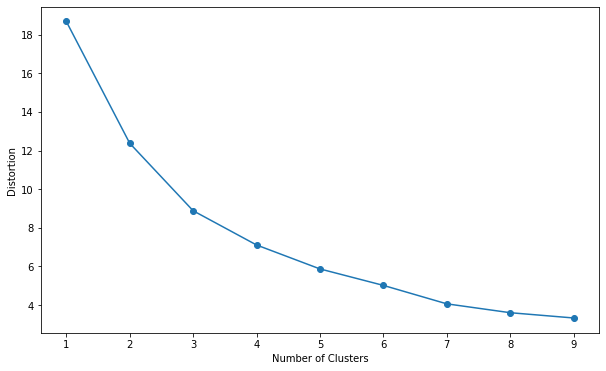

In [ ]:
# data 참조
data_elbow = data2.copy()

distortions = []
for i in range(1,10):
    km = KMeans(
    n_clusters= i, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
    )
    km.fit(data_elbow)
    distortions.append(km.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,10), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
# k-means clustering

data3 = data2.copy()
model2 = KMeans(n_clusters=3, random_state=2021009, algorithm='auto')
model2.fit(data3)

KMeans(n_clusters=3, random_state=2021009)

In [ ]:
# 각 군집(cluster) 표시
pred2 = model2.predict(data3)
pred2

array([1, 0, 1, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0,
       2, 2, 1, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2])

In [ ]:
# 원형 데이터에 군집 예측치 추가
data3['k_means_cluster'] = pred2
data3

,multi_pop,9인이하_사업체수,일평균 승하차인구수,k_means_cluster
2,0.389874,0.925729,0.702160,1
6,0.130150,0.012821,0.299409,0
7,0.856355,0.908856,0.936406,1
9,0.212332,0.068008,0.197896,2
10,0.152005,0.122900,0.380028,0
12,0.238187,0.060197,0.257691,2
14,0.173334,0.168656,0.045316,2
17,0.108071,0.068744,0.594816,0
19,0.161240,0.170056,0.063492,2
21,0.342239,0.083039,0.072278,2


In [ ]:
# 군집별 통계(평균)
cluster_k1 = data3.groupby('k_means_cluster')
cluster_k1.mean()

,multi_pop,9인이하_사업체수,일평균 승하차인구수
k_means_cluster,,,
0,0.163868,0.125675,0.444096
1,0.456706,0.870130,0.551588
2,0.288204,0.152910,0.135435


In [ ]:
# 군집별 통계(중앙값)
cluster_k1 = data3.groupby('k_means_cluster')
cluster_k1.median()

,multi_pop,9인이하_사업체수,일평균 승하차인구수
k_means_cluster,,,
0,0.127541,0.091217,0.415112
1,0.363853,0.908856,0.543959
2,0.241059,0.101238,0.128298


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

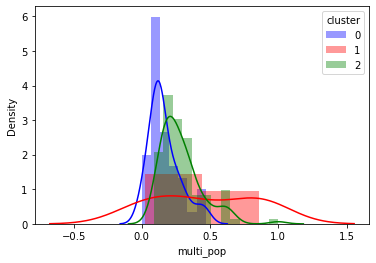

In [ ]:
# 시각화
import seaborn as sns

sns.distplot(data3[data3.k_means_cluster == 0]["multi_pop"], 
             color="blue", label=0)

sns.distplot(data3[data3.k_means_cluster == 1]["multi_pop"], 
             color="red", label=1)

sns.distplot(data3[data3.k_means_cluster == 2]["multi_pop"], 
             color="green", label=2)

plt.legend(title="cluster")
plt.show()

In [ ]:
raw2 = raw.copy()
raw2['k_means_cluster'] = pred2
raw2

,역사명,역위도,역경도,multi_pop,1인가구,4인가구,거주인구수,공실_총_면적,9인이하_사업체수,일평균 승하차인구수,k_means_cluster
2,가산디지털단지역,37.481393,126.882605,288939720,12360,651,23377,0.00,13365,88148.821430,1
6,강남구청역,37.517160,127.041219,104649745,4601,1317,22745,73.30,975,39223.678570,0
7,강남역,37.497202,127.028054,619936066,17411,1063,35606,39.90,13136,116604.321400,1
9,강동역,37.535879,127.132079,162963300,6810,1060,23930,0.00,1724,26892.178570,2
10,강변역,37.534877,127.094694,120157669,4159,2264,28891,0.00,2469,49017.035710,0
12,개봉역,37.494698,126.858504,181308753,5319,2207,34087,0.00,1618,34155.964290,2
14,개화산역,37.572312,126.806289,135291720,5820,1172,23246,0.00,3090,8357.142857,2
17,건대입구역,37.540609,127.069963,88983426,5097,824,17458,101.72,1734,75108.892860,0
19,경찰병원역,37.495765,127.124300,126710280,4770,1762,26564,0.00,3109,10565.142860,2
21,고려대역,37.590339,127.035864,255139782,6533,2792,39054,0.00,1928,11632.500000,2


In [ ]:
pd.set_option("display.max_rows", None)

analysis2 = raw2.copy()
analysis2 = analysis2.sort_values(by='k_means_cluster')
analysis2

,역사명,역위도,역경도,multi_pop,1인가구,4인가구,거주인구수,공실_총_면적,9인이하_사업체수,일평균 승하차인구수,k_means_cluster
179,신대방역,37.487413,126.913594,94517932,4051,1830,23332,0.00,981,40918.357140,0
46,김포공항역,37.562298,126.801711,135291720,5820,1172,23246,0.00,3090,45037.357140,0
47,까치산역,37.531684,126.846743,119816610,4870,1325,24603,0.00,1216,44617.321430,0
138,상봉역,37.595667,127.085620,81889026,3342,1835,24503,0.00,1068,35750.214290,0
50,남부터미널역,37.484825,127.016190,82729906,3997,1387,20698,0.00,3244,44289.821430,0
256,종로5가역,37.571007,127.001799,12300642,2402,172,5121,0.00,7012,53036.000000,0
56,노량진역,37.514072,126.941671,246940856,7736,1842,31921,0.00,1736,55181.964290,0
57,노원역,37.655055,127.062250,66845450,3310,1582,20195,0.00,2493,63206.000000,0
200,압구정역,37.526686,127.028370,108396873,2799,1126,38727,0.00,3589,48463.678570,0
204,양재역,37.483812,127.034577,266394612,6116,3072,43557,39.00,3048,55850.535710,0


In [ ]:
is_0 = raw2['k_means_cluster'] == 0
is_1 = raw2['k_means_cluster'] == 1
is_2 = raw2['k_means_cluster'] == 2

In [ ]:
print(len(raw2[is_0]))
raw2[is_0]

45


,역사명,역위도,역경도,multi_pop,1인가구,4인가구,거주인구수,공실_총_면적,9인이하_사업체수,일평균 승하차인구수,k_means_cluster
6,강남구청역,37.517160,127.041219,104649745,4601,1317,22745,73.30,975,39223.67857,0
10,강변역,37.534877,127.094694,120157669,4159,2264,28891,0.00,2469,49017.03571,0
17,건대입구역,37.540609,127.069963,88983426,5097,824,17458,101.72,1734,75108.89286,0
22,고속터미널역,37.504366,127.004740,34302220,1805,1517,19004,34.57,2884,118627.64290,0
23,공덕역,37.543428,126.951797,326557514,8761,2183,37274,65.71,2569,53849.03571,0
30,교대역,37.493201,127.014124,82729906,3997,1387,20698,15.00,3244,65872.39286,0
31,구로디지털단지역,37.485162,126.901485,186503644,7894,1138,23626,0.00,6147,85471.96429,0
36,구의역,37.536919,127.085730,102798592,4108,1738,25024,23.10,1343,35378.17857,0
40,군자역,37.557134,127.079433,67704525,4347,759,15575,75.92,1501,38280.28571,0
46,김포공항역,37.562298,126.801711,135291720,5820,1172,23246,0.00,3090,45037.35714,0


In [ ]:
print(len(raw2[is_1]))
raw2[is_1]

10


,역사명,역위도,역경도,multi_pop,1인가구,4인가구,거주인구수,공실_총_면적,9인이하_사업체수,일평균 승하차인구수,k_means_cluster
2,가산디지털단지역,37.481393,126.882605,288939720,12360,651,23377,0.00,13365,88148.82143,1
7,강남역,37.497202,127.028054,619936066,17411,1063,35606,39.90,13136,116604.32140,1
155,선릉역,37.504429,127.048819,619936066,17411,1063,35606,136.04,13136,91382.53571,1
175,신논현역,37.504724,127.025380,619936066,17411,1063,35606,0.00,13136,45780.75000,1
196,안국역,37.576664,126.985479,30300024,4206,194,7204,28.80,14373,29997.32143,1
212,역삼역,37.500545,127.036394,619936066,17411,1063,35606,47.95,13136,69047.89286,1
254,종각역,37.570203,126.982948,30300024,4206,194,7204,139.19,14373,44804.78571,1
255,종로3가역,37.571394,126.991345,30300024,4206,194,7204,351.58,14373,38007.14286,1
284,합정역,37.549699,126.914124,252013060,10060,995,25051,30.74,8538,68814.07143,1
287,홍대입구역,37.557548,126.925258,252013060,10060,995,25051,0.00,8538,105989.67860,1


In [ ]:
print(len(raw2[is_2]))
raw2[is_2]

103


,역사명,역위도,역경도,multi_pop,1인가구,4인가구,거주인구수,공실_총_면적,9인이하_사업체수,일평균 승하차인구수,k_means_cluster
9,강동역,37.535879,127.132079,162963300,6810,1060,23930,0.00,1724,26892.178570,2
12,개봉역,37.494698,126.858504,181308753,5319,2207,34087,0.00,1618,34155.964290,2
14,개화산역,37.572312,126.806289,135291720,5820,1172,23246,0.00,3090,8357.142857,2
19,경찰병원역,37.495765,127.124300,126710280,4770,1762,26564,0.00,3109,10565.142860,2
21,고려대역,37.590339,127.035864,255139782,6533,2792,39054,0.00,1928,11632.500000,2
24,공릉역,37.625513,127.072824,320198814,8658,2300,36983,0.00,2650,18389.357140,2
29,광흥창역,37.547470,126.931818,143186052,5738,1598,24954,0.00,1675,13002.571430,2
32,구로역,37.503178,126.882037,224137110,7638,1625,29345,0.00,4182,29010.250000,2
35,구산역,37.611259,126.917192,144205088,4442,2115,32464,0.00,1139,10618.357140,2
37,구일역,37.496273,126.869599,155099628,6452,1084,24039,0.00,7363,9599.500000,2


## 1-3 Robust Scaler 

In [ ]:
# scaling (z-standardization)
data4 = raw.copy()
data4 = data[['multi_pop','9인이하_사업체수','일평균 승하차인구수']]
data4 = pd.DataFrame(RobustScaler().fit_transform(data), columns=data.columns, index = data.index)
data4.head()

,multi_pop,9인이하_사업체수,일평균 승하차인구수
2,0.790516,4.102843,2.188783
6,-0.528508,-0.472489,0.470863
7,3.159567,4.018279,3.187947
9,-0.111139,-0.195901,0.037864
10,-0.417513,0.079210,0.814739


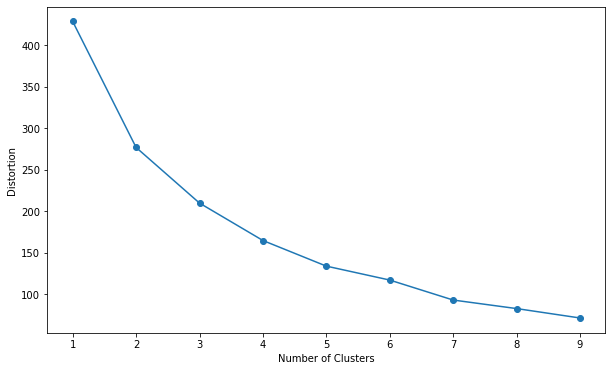

In [ ]:
# data 참조
data_elbow = data4.copy()

distortions = []
for i in range(1,10):
    km = KMeans(
    n_clusters= i, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
    )
    km.fit(data_elbow)
    distortions.append(km.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,10), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
# k-means clustering

data5 = data4.copy()
model3 = KMeans(n_clusters=3, random_state=2021009, algorithm='auto')
model3.fit(data1)

KMeans(n_clusters=3, random_state=2021009)

In [ ]:
# 각 군집(cluster) 표시
pred3 = model3.predict(data1)
pred3

array([2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1])

In [ ]:
# 원형 데이터에 군집 예측치 추가
data5['k_means_cluster'] = pred3
data5

,multi_pop,9인이하_사업체수,일평균 승하차인구수,k_means_cluster
2,0.790516,4.102843,2.188783,2
6,-0.528508,-0.472489,0.470863,0
7,3.159567,4.018279,3.187947,2
9,-0.111139,-0.195901,0.037864,1
10,-0.417513,0.079210,0.814739,0
12,0.020165,-0.235044,0.292919,1
14,-0.309194,0.308530,-0.612961,1
17,-0.640637,-0.192208,1.730909,0
19,-0.370614,0.315547,-0.535431,1
21,0.548599,-0.120569,-0.497953,1


In [ ]:
# 군집별 통계(평균)
cluster_k1 = data5.groupby('k_means_cluster')
cluster_k1.mean()

,multi_pop,9인이하_사업체수,일평균 승하차인구수
k_means_cluster,,,
0,-0.357270,0.093119,1.088020
1,0.274179,0.229613,-0.228560
2,1.129926,3.824188,1.546523


In [ ]:
# 군집별 통계(중앙값)
cluster_k1 = data5.groupby('k_means_cluster')
cluster_k1.median()

,multi_pop,9인이하_사업체수,일평균 승하차인구수
k_means_cluster,,,
0,-0.541758,-0.079579,0.964389
1,0.034748,-0.029357,-0.259002
2,0.658368,4.018279,1.513982


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

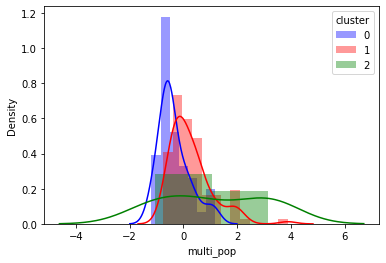

In [ ]:
# 시각화
import seaborn as sns

sns.distplot(data5[data5.k_means_cluster == 0]["multi_pop"], 
             color="blue", label=0)

sns.distplot(data5[data5.k_means_cluster == 1]["multi_pop"], 
             color="red", label=1)

sns.distplot(data5[data5.k_means_cluster == 2]["multi_pop"], 
             color="green", label=2)


plt.legend(title="cluster")
plt.show()

In [ ]:
raw3 = raw.copy()
raw3['k_means_cluster'] = pred3
raw3

,역사명,역위도,역경도,multi_pop,1인가구,4인가구,거주인구수,공실_총_면적,9인이하_사업체수,일평균 승하차인구수,k_means_cluster
2,가산디지털단지역,37.481393,126.882605,288939720,12360,651,23377,0.00,13365,88148.821430,2
6,강남구청역,37.517160,127.041219,104649745,4601,1317,22745,73.30,975,39223.678570,0
7,강남역,37.497202,127.028054,619936066,17411,1063,35606,39.90,13136,116604.321400,2
9,강동역,37.535879,127.132079,162963300,6810,1060,23930,0.00,1724,26892.178570,1
10,강변역,37.534877,127.094694,120157669,4159,2264,28891,0.00,2469,49017.035710,0
12,개봉역,37.494698,126.858504,181308753,5319,2207,34087,0.00,1618,34155.964290,1
14,개화산역,37.572312,126.806289,135291720,5820,1172,23246,0.00,3090,8357.142857,1
17,건대입구역,37.540609,127.069963,88983426,5097,824,17458,101.72,1734,75108.892860,0
19,경찰병원역,37.495765,127.124300,126710280,4770,1762,26564,0.00,3109,10565.142860,1
21,고려대역,37.590339,127.035864,255139782,6533,2792,39054,0.00,1928,11632.500000,1


In [ ]:
pd.set_option("display.max_rows", None)

analysis3 = raw3.copy()
analysis3 = analysis3.sort_values(by='k_means_cluster')
analysis3

,역사명,역위도,역경도,multi_pop,1인가구,4인가구,거주인구수,공실_총_면적,9인이하_사업체수,일평균 승하차인구수,k_means_cluster
168,수유역,37.637965,127.025443,178978065,6009,1764,29785,0.00,1977,53649.607140,0
46,김포공항역,37.562298,126.801711,135291720,5820,1172,23246,0.00,3090,45037.357140,0
47,까치산역,37.531684,126.846743,119816610,4870,1325,24603,0.00,1216,44617.321430,0
185,신사역,37.516188,127.020092,216379625,9625,728,22481,23.70,4520,45224.857140,0
204,양재역,37.483812,127.034577,266394612,6116,3072,43557,39.00,3048,55850.535710,0
50,남부터미널역,37.484825,127.016190,82729906,3997,1387,20698,0.00,3244,44289.821430,0
200,압구정역,37.526686,127.028370,108396873,2799,1126,38727,0.00,3589,48463.678570,0
56,노량진역,37.514072,126.941671,246940856,7736,1842,31921,0.00,1736,55181.964290,0
57,노원역,37.655055,127.062250,66845450,3310,1582,20195,0.00,2493,63206.000000,0
247,잠실역,37.513817,127.102342,16512793,979,1471,16867,28.60,2193,124329.535700,0


In [ ]:
is_0 = raw3['k_means_cluster'] == 0
is_1 = raw3['k_means_cluster'] == 1
is_2 = raw3['k_means_cluster'] == 2

In [ ]:
print(len(raw3[is_0]))
raw1[is_0]

45


,역사명,역위도,역경도,multi_pop,1인가구,4인가구,거주인구수,공실_총_면적,9인이하_사업체수,일평균 승하차인구수,k_means_cluster
6,강남구청역,37.517160,127.041219,104649745,4601,1317,22745,73.30,975,39223.67857,0
10,강변역,37.534877,127.094694,120157669,4159,2264,28891,0.00,2469,49017.03571,0
17,건대입구역,37.540609,127.069963,88983426,5097,824,17458,101.72,1734,75108.89286,0
22,고속터미널역,37.504366,127.004740,34302220,1805,1517,19004,34.57,2884,118627.64290,0
23,공덕역,37.543428,126.951797,326557514,8761,2183,37274,65.71,2569,53849.03571,0
30,교대역,37.493201,127.014124,82729906,3997,1387,20698,15.00,3244,65872.39286,0
31,구로디지털단지역,37.485162,126.901485,186503644,7894,1138,23626,0.00,6147,85471.96429,0
36,구의역,37.536919,127.085730,102798592,4108,1738,25024,23.10,1343,35378.17857,0
40,군자역,37.557134,127.079433,67704525,4347,759,15575,75.92,1501,38280.28571,0
46,김포공항역,37.562298,126.801711,135291720,5820,1172,23246,0.00,3090,45037.35714,0


In [ ]:
print(len(raw3[is_1]))
raw1[is_1]

103


,역사명,역위도,역경도,multi_pop,1인가구,4인가구,거주인구수,공실_총_면적,9인이하_사업체수,일평균 승하차인구수,k_means_cluster
9,강동역,37.535879,127.132079,162963300,6810,1060,23930,0.00,1724,26892.178570,1
12,개봉역,37.494698,126.858504,181308753,5319,2207,34087,0.00,1618,34155.964290,1
14,개화산역,37.572312,126.806289,135291720,5820,1172,23246,0.00,3090,8357.142857,1
19,경찰병원역,37.495765,127.124300,126710280,4770,1762,26564,0.00,3109,10565.142860,1
21,고려대역,37.590339,127.035864,255139782,6533,2792,39054,0.00,1928,11632.500000,1
24,공릉역,37.625513,127.072824,320198814,8658,2300,36983,0.00,2650,18389.357140,1
29,광흥창역,37.547470,126.931818,143186052,5738,1598,24954,0.00,1675,13002.571430,1
32,구로역,37.503178,126.882037,224137110,7638,1625,29345,0.00,4182,29010.250000,1
35,구산역,37.611259,126.917192,144205088,4442,2115,32464,0.00,1139,10618.357140,1
37,구일역,37.496273,126.869599,155099628,6452,1084,24039,0.00,7363,9599.500000,1


In [ ]:
print(len(raw3[is_2]))
raw1[is_2]

10


,역사명,역위도,역경도,multi_pop,1인가구,4인가구,거주인구수,공실_총_면적,9인이하_사업체수,일평균 승하차인구수,k_means_cluster
2,가산디지털단지역,37.481393,126.882605,288939720,12360,651,23377,0.00,13365,88148.82143,2
7,강남역,37.497202,127.028054,619936066,17411,1063,35606,39.90,13136,116604.32140,2
155,선릉역,37.504429,127.048819,619936066,17411,1063,35606,136.04,13136,91382.53571,2
175,신논현역,37.504724,127.025380,619936066,17411,1063,35606,0.00,13136,45780.75000,2
196,안국역,37.576664,126.985479,30300024,4206,194,7204,28.80,14373,29997.32143,2
212,역삼역,37.500545,127.036394,619936066,17411,1063,35606,47.95,13136,69047.89286,2
254,종각역,37.570203,126.982948,30300024,4206,194,7204,139.19,14373,44804.78571,2
255,종로3가역,37.571394,126.991345,30300024,4206,194,7204,351.58,14373,38007.14286,2
284,합정역,37.549699,126.914124,252013060,10060,995,25051,30.74,8538,68814.07143,2
287,홍대입구역,37.557548,126.925258,252013060,10060,995,25051,0.00,8538,105989.67860,2
